In [3]:
import seaborn as sns

mpg = sns.load_dataset("mpg")

In [5]:
print(mpg.info())

# İlk 10 satırı yazdır
print(mpg.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17

In [7]:
mpg_ortalamasi = mpg['mpg'].mean()
mpg_ortalamasi

23.514572864321607

In [11]:
mpgOrtalamasi=mpg['mpg'].mean()
mpgVaryansı=mpg['mpg'].var()
mpgMin=mpg['mpg'].min()
mpgMax=mpg['mpg'].max()
mpgOrtalamasi


23.514572864321607

In [13]:
mpgVaryansı


61.089610774274405

In [15]:
mpgMin


9.0

In [16]:
mpgMax

46.6

<Axes: xlabel='horsepower', ylabel='weight'>

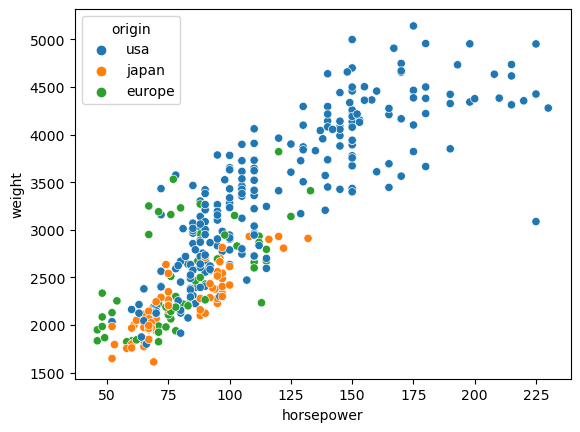

In [19]:
sns.scatterplot(data=mpg, x='horsepower', y='weight', hue='origin')

In [23]:
from scipy.stats import kendalltau
kendalKorelasyon,_=kendalltau(mpg['mpg'],mpg['acceleration'])
kendalKorelasyon

0.30109590846759365

In [25]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Veri setini yükle
mpg = sns.load_dataset("mpg")

# Eksik verileri kontrol et
print(mpg.isnull().sum())

# Eksik verileri sil (varsa)
mpg.dropna(subset=['horsepower', 'acceleration', 'weight', 'mpg'], inplace=True)

# LinearRegression modeli oluştur
model = LinearRegression()

# Bağımsız değişkenler ve bağımlı değişken
X = mpg[['horsepower', 'acceleration', 'weight']]
y = mpg['mpg']

# Modeli eğit
model.fit(X, y)

# Modelin intercept ve katsayıları
print("Intercept:", model.intercept_)
print("Katsayılar:", model.coef_)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
Intercept: 45.678292876955894
Katsayılar: [-0.04749562 -0.00206566 -0.0057894 ]


In [27]:
from sklearn.metrics import r2_score

# Tahminleri al
y_pred = model.predict(X)

# R-kare değerini hesapla
r_squared = r2_score(y, y_pred)
print("R-squared değeri:", r_squared)


R-squared değeri: 0.7063754859981903


In [32]:
horsepower = 130
acceleration = 13
weight = 3500
dizi = [[horsepower, acceleration, weight]]
mpgTahmin = model.predict(dizi)
mpgTahmin[0]


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.214100258794925